In [1]:
import pandas as pd
import seaborn as srn 
import statistics as sts

In [2]:
#importar dados
dataset = pd.read_csv("./data/tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
#explorar dados categóricos
#aparencia
grouped = dataset.groupby(['Aparencia']).size()
grouped

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

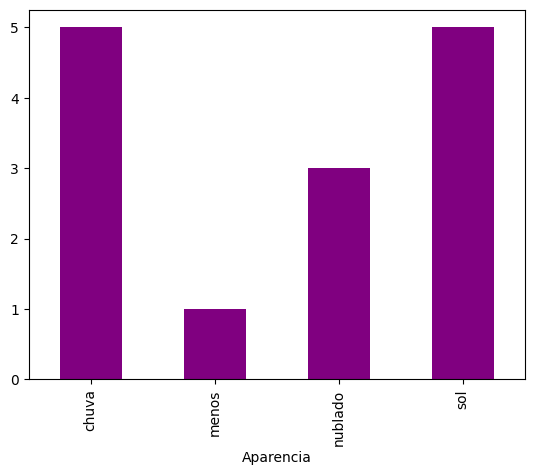

In [4]:
grouped.plot.bar(color="purple")

In [5]:
#vento
grouped1 = dataset.groupby(['Vento']).size()
grouped1

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

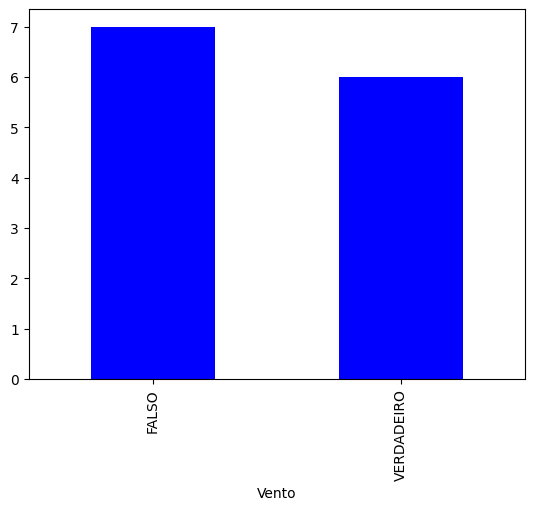

In [6]:
grouped1.plot.bar(color="blue")

In [7]:
#jogar
grouped2 = dataset.groupby(['Jogar']).size()
grouped2

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

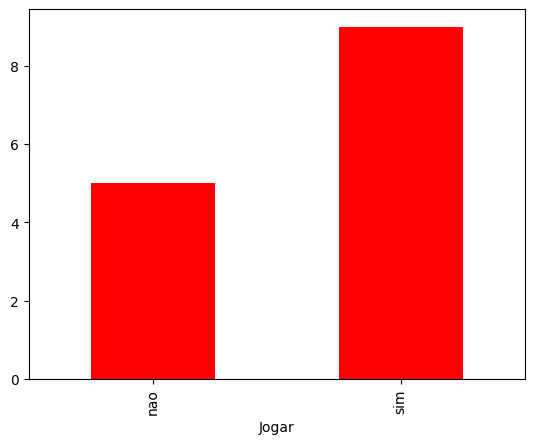

In [8]:
grouped2.plot.bar(color="red")

In [9]:
#explorar colunas numericas 
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

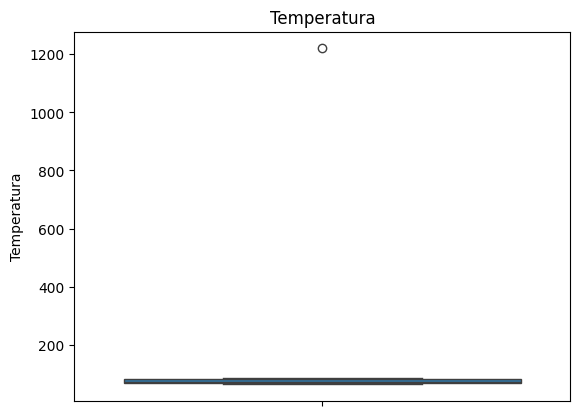

In [10]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

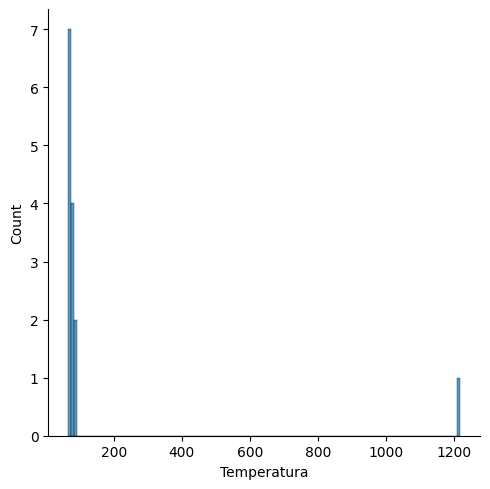

In [11]:
srn.displot(dataset['Temperatura'])

In [12]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

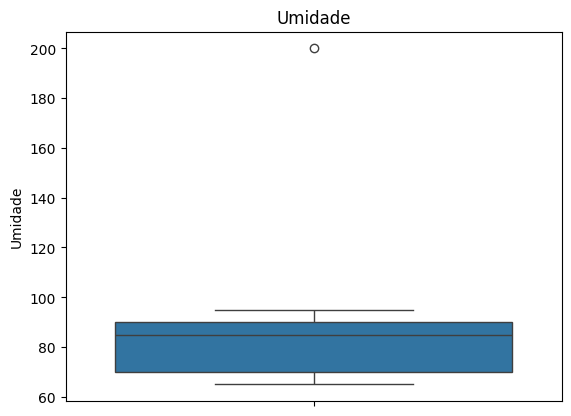

In [13]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

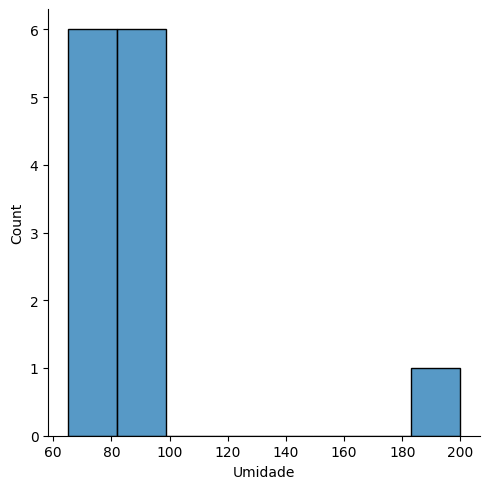

In [14]:
srn.displot(dataset['Umidade'])

In [15]:
#contar valores NA
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [16]:
#valor invalido -> Aparencia
grouped3 = dataset.groupby(['Aparencia']).size()
grouped3

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [18]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "Sol"
#ver resultado
grouped4 = dataset.groupby(['Aparencia']).size()
grouped4

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [19]:
#temperatura fora de dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [20]:
#visualizar
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [21]:
#mediana
median = sts.median(dataset['Temperatura'])
median

73.5

In [22]:
#substituir
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] =  median

C:\Users\arnal\AppData\Local\Temp\ipykernel_16180\2913525086.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] =  median


In [23]:
#verificar se ainda há dados fora do domínio
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [24]:
#umidade, dominio e NA
grouped5 = dataset.groupby(['Umidade']).size() 
grouped5

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [25]:
#total de NAs
dataset['Umidade'].isnull().sum()

1

In [27]:
#mediana
median2  = sts.median(dataset['Umidade'])
median2

85.5

In [28]:
#preencher NA
dataset['Umidade'].fillna(median, inplace =  True)

In [29]:
dataset['Umidade'].isnull().sum()

0

In [30]:
#visualizar de acordo com o domínio 
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [31]:
#atualizar com a mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = median

In [32]:
#visualizar de novo
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade']

Series([], Name: Umidade, dtype: float64)

In [33]:
#Ventos 
grouped6 = dataset.groupby(['Vento']).size()
grouped6

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [34]:
#soma de NA
dataset['Vento'].isnull().sum()

1

In [35]:
#preenche NAs
dataset['Vento'].fillna('FALSO', inplace =  True)

In [36]:
#soma NA
dataset['Vento'].isnull().sum()

0

<Axes: xlabel='Temperatura', ylabel='Count'>

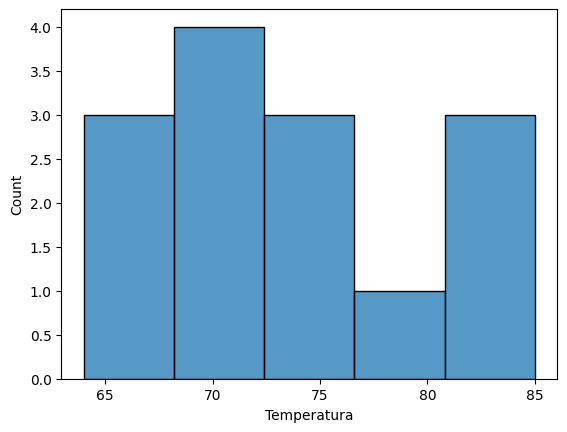

In [37]:
srn.histplot(dataset['Temperatura'])

<Axes: xlabel='Umidade', ylabel='Count'>

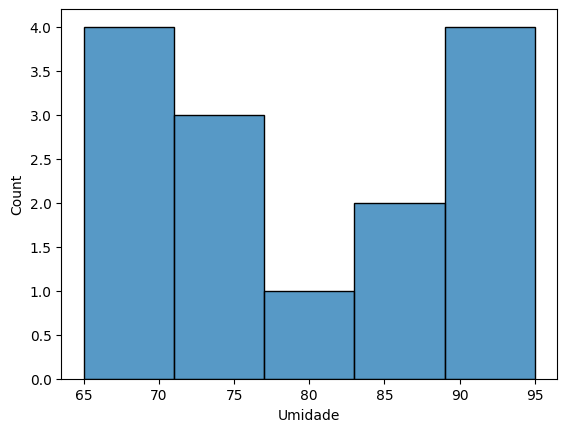

In [38]:
srn.histplot(dataset['Umidade'])